In [1]:
# Data visualization
import matplotlib.pyplot as plt
import cartopy

# Data manipulation
import pandas as pd
import numpy as np
import xarray as xr

# todo: mount GPU on colab.

In [2]:
repo_root = '../' # use 'climate-emulator-tutorial/' on colab and '../' on local machine
data_root = repo_root + 'data/'

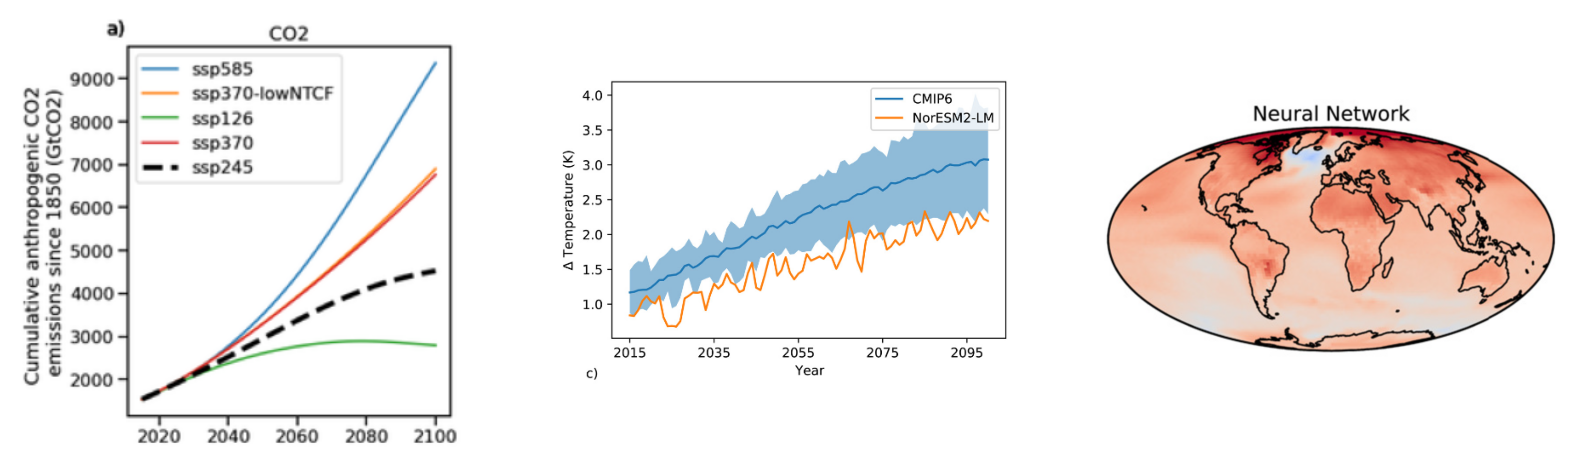

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import math

images = []
images.append(repo_root+'figures/tutorial/co2_over_time_per_scenario_climatebench.png')
images.append(repo_root+'figures/tutorial/global_t_over_time_in_ssp245.png')
images.append(repo_root+'figures/tutorial/t_over_space_avg_2080_2100_ssp245.png')

plt.figure(figsize=(20,10))
columns = 3
for i, image in enumerate(images):
    plt.subplot(math.ceil(len(images) / columns), columns, i + 1)
    im = Image.open(image)
    plt.imshow(im)
    plt.axis('off')

In [4]:
#@title code: load ClimateBench data
from emcli.data.climatebench import load_climatebench_train_data

scenarios = ['ssp126','ssp370','ssp585','hist-GHG','hist-aer']
len_historical = 165
data_path = data_root + '/'

X_train, Y_train = load_climatebench_train_data(
  simus=scenarios, len_historical=len_historical, 
  data_path=data_path)


Frozen({'time': 251, 'longitude': 144, 'latitude': 96}) ssp126
Frozen({'time': 251, 'longitude': 144, 'latitude': 96}) ssp370
Frozen({'time': 251, 'longitude': 144, 'latitude': 96}) ssp585
Frozen({'time': 165, 'longitude': 144, 'latitude': 96}) hist-GHG
Frozen({'time': 165, 'longitude': 144, 'latitude': 96}) hist-aer


In [18]:
X_train[0]['CO2'].shape

(251,)

In [23]:
print('Number of training scenarios:', len(X_train))
print('Inputs:')
print('\tInput channels:', ', '.join(list(X_train[0].data_vars)))
print(f'\tThe scenarios have {X_train[0]["CO2"].shape} (ssp) or {X_train[3]["CO2"].shape} (historical) time steps.')
print(f'\tCO2 and CH4 are global [{X_train[0]["CO2"].shape}, {X_train[0]["CH4"].shape}], while SO2 and BC are spatially resolved [{X_train[0]["SO2"].shape}, {X_train[0]["BC"].shape}].')
print('Outputs:')
print('\tOutput channels:', ', '.join(list(Y_train[0].data_vars)))
print(f'\tAll outputs are spatially resolved: {Y_train[0]["tas"].shape} (ssp) or {Y_train[3]["tas"].shape} (historical).')

Number of training scenarios: 5
Inputs:
	Input channels: CO2, SO2, CH4, BC
	The scenarios have (251,) (ssp) or (165,) (historical) time steps.
	CO2 and CH4 are global [(251,), (251,)], while SO2 and BC are spatially resolved [(251, 96, 144), (251, 96, 144)].
Outputs:
	Output channels: diurnal_temperature_range, tas, pr, pr90
	All outputs are spatially resolved: (251, 96, 144) (ssp) or (165, 96, 144) (historical).


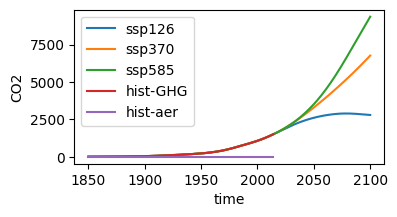

In [6]:
from matplotlib import pyplot as plt
X_train[0]['CO2'].plot(figsize=(4,2), label='ssp126')
X_train[1]['CO2'].plot(label='ssp370')
X_train[2]['CO2'].plot(label='ssp585')
X_train[3]['CO2'].plot(label='hist-GHG')
X_train[4]['CO2'].plot(label='hist-aer')
plt.legend()
plt.show()

In [7]:
_train[0]

NameError: name '_train' is not defined